# Project 11 - Working with Geocoded Data

In [1]:
!pip install GDAL-3.1.4-cp38-cp38-win_amd64.whl
!pip install Fiona-1.8.17-cp38-cp38-win_amd64.whl
!pip install Shapely-1.7.1-cp38-cp38-win_amd64.whl
!pip install geopandas

Processing c:\git\econ-611\in class projects\gdal-3.1.4-cp38-cp38-win_amd64.whl
GDAL is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing c:\git\econ-611\in class projects\fiona-1.8.17-cp38-cp38-win_amd64.whl
Fiona is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing c:\git\econ-611\in class projects\shapely-1.7.1-cp38-cp38-win_amd64.whl
Shapely is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [2]:
!pip install datadotworld --user

In [3]:
# Import all modules that will be used
import geopandas
import numpy as np
import pandas as pd

# Won't actually use datetime directly. Since the dataframe index will use 
# data formatted as datetime64, import it in case need to use the datetime
# module to troubleshoot later 
import datetime

# Could technically call many of the submodules from matplotlib using mpl., 
# but for convenience, explicitly import submodules. These will be used for 
# constructing visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# If choose to make a dynamic visualization for the homework
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick
import datadotworld as dw

In [4]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    # Import county level shapefile
    map_data = geopandas.read_file(filename = filename,
                                  index_col = index_col)
    # Rename fips code to match variable name in COVID-19 data
    map_data.rename(columns = {"State":"state"}, inplace = True)
    # Combines statefips and county fips to create single fips value
    # that indicates state and county
    
    # Concatenates string
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) +\
        map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)
    
    return map_data

In [5]:
# Include this dictionary to conveniently cross reference state names and
# state abbreviations.
state_dict = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS', 'Kentucky': 'KY',
    'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [6]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date", FIPS_name = fips_name)

In [7]:
map_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
fips_code                                                               
21007           21      007  00516850  0500000US21007    Ballard   06   
21017           21      017  00516855  0500000US21017    Bourbon   06   
21031           21      031  00516862  0500000US21031     Butler   06   
21065           21      065  00516879  0500000US21065     Estill   06   
21069           21      069  00516881  0500000US21069    Fleming   06   
...            ...      ...       ...             ...        ...  ...   
31073           31      073  00835858  0500000US31073     Gosper   06   
39075           39      075  01074050  0500000US39075     Holmes   06   
48171           48      171  01383871  0500000US48171  Gillespie   06   
55079           55      079  01581100  0500000US55079  Milwaukee   06   
26139           26      139  01623012  0500000US26139     Ottawa   06   

                ALAND      AWATER  Population      state  \
fips_code                                                  
21007       639387454    69473325      7888.0   Kentucky   
21017       750439351     4829777     19788.0   Kentucky   
21031      1103571974    13943044     12879.0   Kentucky   
21065       655509930     6516335     14106.0   Kentucky   
21069       902727151     7182793     14581.0   Kentucky   
...               ...         ...         ...        ...   
31073      1186616237    11831826      1990.0   Nebraska   
39075      1094405866     3695230     43960.0       Ohio   
48171      2740719114     9012764     26988.0      Texas   
55079       625440563  2455383635    945726.0  Wisconsin   
26139      1459502408  2765830983    291830.0   Michigan   

                                                    geometry  
fips_code                                                     
21007      POLYGON ((-89.18137 37.04630, -89.17938 37.053...  
21017      POLYGON ((-84.44266 38.28324, -84.44114 38.283...  
21031      POLYGON ((-86.94486 37.07341, -86.94346 37.074...  
21065      POLYGON ((-84.12662 37.64540, -84.12483 37.646...  
21069      POLYGON ((-83.98428 38.44549, -83.98246 38.450...  
...                                                      ...  
31073      POLYGON ((-100.09510 40.43866, -100.08937 40.4...  
39075      POLYGON ((-82.22066 40.66758, -82.19327 40.667...  
48171      POLYGON ((-99.30400 30.49983, -99.28234 30.499...  
55079      POLYGON ((-88.06959 42.86726, -88.06959 42.872...  
26139      POLYGON ((-86.26432 43.11830, -86.25103 43.118...  

[3142 rows x 11 columns]

Text(0.5, 1.0, 'Oregon')

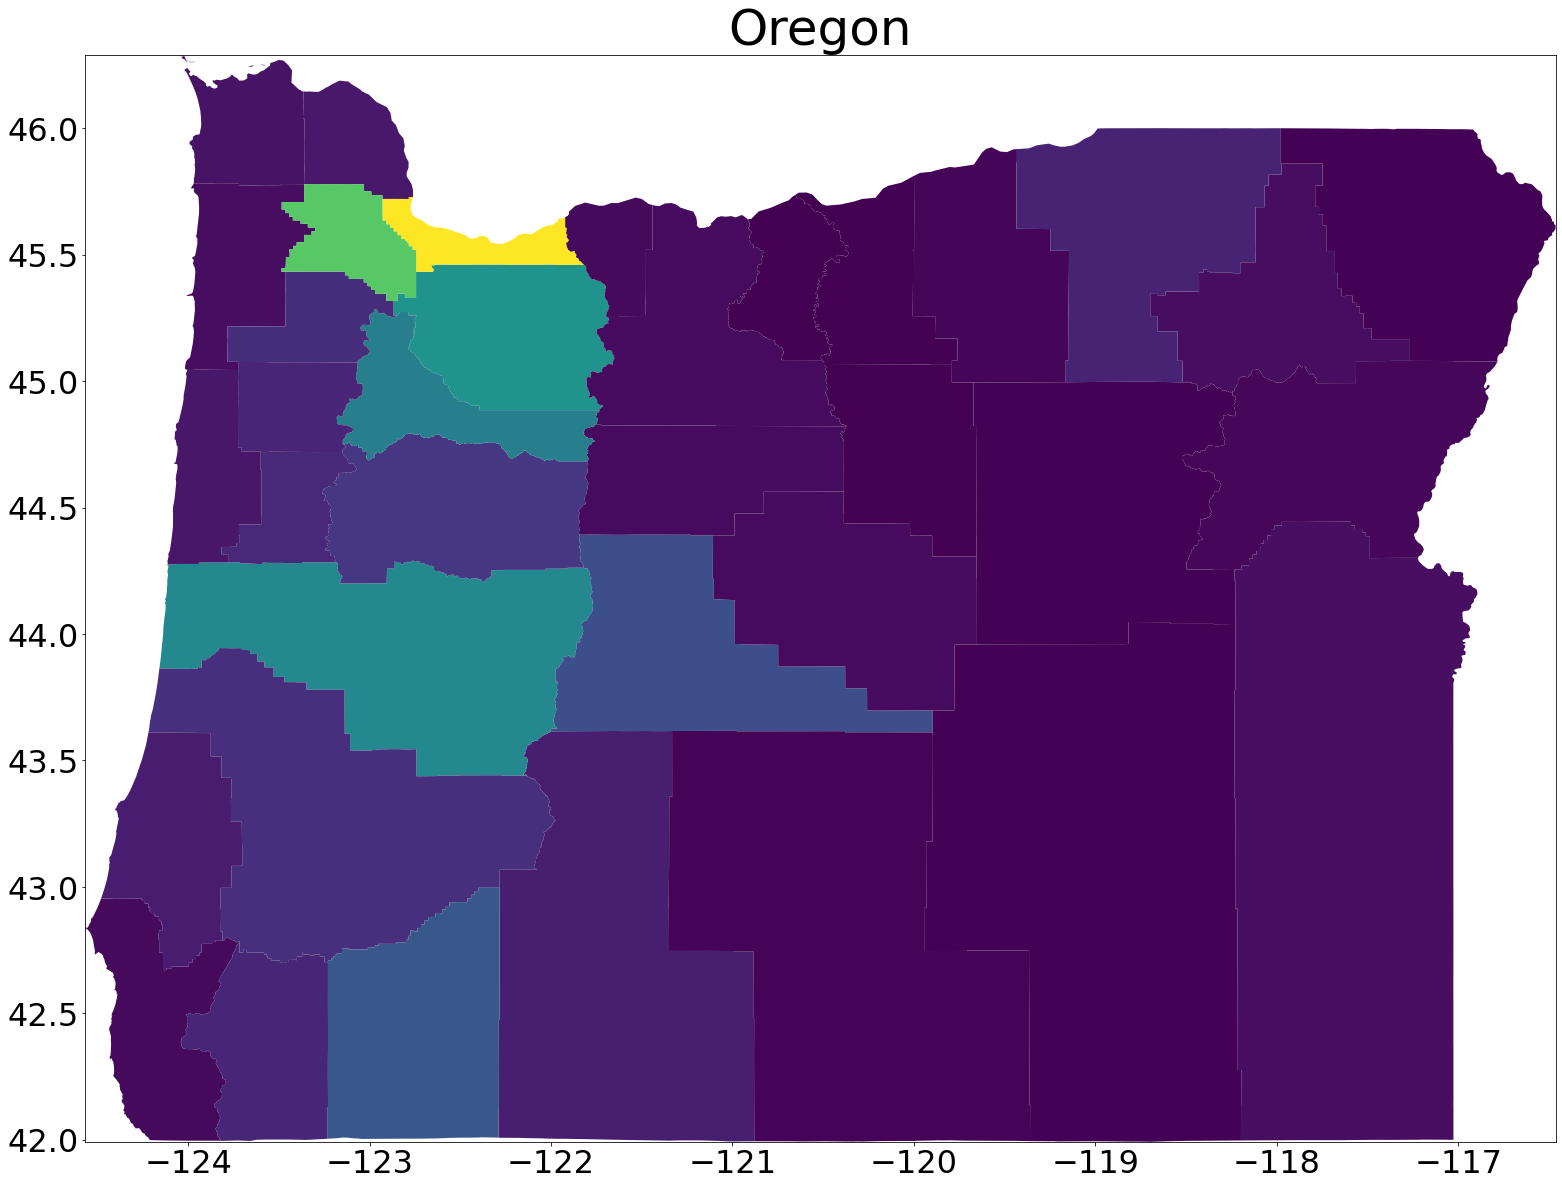

In [8]:
fig, ax = plt.subplots(figsize = (30, 20))
map_data[map_data["state"] == "Oregon"].plot(column = "Population", ax = ax)
ax.set_title("Oregon", fontsize = 50)

In [9]:
def import_covid_data(FIPS_name):
    dataset = dw.load_dataset(
        "associatedpress/johns-hopkins-coronavirus-case-tracker",
        auto_update = True)
    covid_data = dataset.dataframes["2_cases_and_deaths_by_county_timeseries"]
    covid_data = covid_data[covid_data[FIPS_name] < 57000]
    covid_data = covid_data[covid_data[FIPS_name] > 0]
    
    # Drops leading zeroes and converts to int
    covid_data[FIPS_name] = covid_data[FIPS_name].astype(np.int64)
    # Formats the data columns as datetime for readability
    covid_data["date"] = pd.to_datetime(covid_data["date"])
    covid_data.set_index([FIPS_name, "date"], inplace = True)
    # Creates new column
    covid_data["state_abr"] = ""
    
    for state, abr in state_dict.items():
        # Calls a slice of the df by state and fills with abreviation
        covid_data.loc[covid_data["state"] == state, "state_abr"] = abr
    covid_data["Location"] = covid_data["location_name"] + ", " + \
                                        covid_data["state_abr"]
    
    return covid_data

In [10]:
covid_data = import_covid_data(FIPS_name = fips_name)

RuntimeError: Configuration file not found at C:\Users\brand/.dw/config.To fix this issue, run dw configure

In [ ]:
covid_data

In [ ]:
# Shows covid data for specific state up to date
covid_data[covid_data["state"] == "Oregon"].groupby("date").sum()[["new_cases", "new_deaths"]]

In [ ]:
fig, ax = plt.subplots(figsize = (20, 14))
covid_data.groupby("date").sum().loc["2021-03-01":, ["new_cases", "New_deaths"]].plot.line(
    secondary_y = "new_deaths", 
    ax = ax)
ax.set_title("United States")

In [ ]:
fig,ax = plt.subplots(figsize = (20,14))
covid_data.groupby("date").sum().loc[:,["new_cases", "new_deaths"]].rolling(7).mean().plot.line(
    secondary_y = "new_deaths", ax = ax)
ax.set_title("United States")

In [ ]:
# Builds a new geo dataframe and stacks it for each day in covid data
def create_merged_geo_dataframe(data, map_date, dates):
    data_frame_initialized = False
    
    counties = data.groupby("fips_code").mean().index
    for date in dates:
        agg_df = map_data[map_data.index.isin(counties)]
        agg_df["date"] = date
        if data_frame_initialized == False:
            # Takes DF, transforms it to geo DF and uses coordinate 
            # system from map data
            matching_gpd = geopands.GeoDataFrame(agg_df,
                                                 crs = map_data.crs)
            data_frame_initialized = True
        # Appends new Df to new DF
        else:
            matching_gpd = matching_gpd.append(
                agg_df,
                ignore_index = False)
    
    matching_gpd.reset_index(inplace = True)
    matching_gpd.set_index(["fips_code", "date"], inplace = True)
    matching_gpd.drop("state", axis = 1, inplace = True)
    
    matching_gpd = pd.concat([matching_gpd, data], axis = 1)
            
    return matching_gpd

In [ ]:
dates = sorted(list(set(covid_data.index.get_level_values("date"))))
covid_data = create_merged_geo_dataframe(covid_data, map_data, dates)

In [ ]:
covid_data

In [ ]:
def create_new_vars(covid_data):
    for key in ["cases", "deaths"]:
        cap_key = key.title()
        covid_data.rename(columns = {"cumulative_" + key : "Total " + cap_key,
                                     "new_" + key: "Daily " + cap_key,
                                     "new_" + key + "_7_day_rolling_avg":"Daily " + cap_key + " 7 Day MA"},
                         inplace = True)
        
        covid_data[cap_key + " per Million"] = covid_data[
            "Total " + cap_key].fillna(0)\
            .div(covid_data["total_population"]).mul(10 ** 6)
        
        # The number of days passed as moving_average_days from rolling average
        covid_data["Daily " + cap_key + " per Million 7 Day MA"] = \
            covid_data["Daily " + cap_key + " 7 Day MA"]\
            .div(covid_data["total_population"]).mul(10 ** 6)
        

create_new_vars(covid_data)

In [ ]:
covid_data

In [ ]:
# Selects data by state
or_data = covid_data[covid_data["state"] == "Oregon"]

# Selects data by date
or_data = or_data[or_data.index.get_level_values("date") == "2021-11-15"]

# Plots data
fig, ax = plt.subplots(figsize = (20, 10))
key = "Daily Deaths per Million 7 Day MA"
or_data.plot(column = key, ax = ax) # Can also include , cmap = "Reds" to change colors on map to red
ax.set_title(key)

In [ ]:
start_date = "01-01-2021"
end_date = dates[-1]

In [ ]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]
    
    return data

date = dates[-1]

if "map_bounded" not in locals():
    minx = covid_data[covid_data.index.get_level_values("date")== date].bounds["minx"].min()
    miny = covid_data[covid_data.index.get_level_values("date")== date].bounds["miny"].min()
    maxx = -58
    maxy = covid_data[covid_data.index.get_level_values("date")== date].bounds["maxy"].max()
    
    # Finds counties using one date and performs operation once instead of 
    # several hundred times
    bounded_data =  select_data_within_bounds(covid_data[covid_data.index.get_level_values("date")== date], minx, miny, maxx, maxy)
    counties = bounded_data.groupby("fips_code").mean().index
    covid_map_data =covid_data[covid_data.index.get_level_values("fips_code").isin(counties)]
    map_bounded = True

In [ ]:
covid_map_data

In [ ]:
covid_map_data.fillna(0, inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.rcParams.update({"font.size": 30})
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
key = "Deaths per Million"
df = covid_map_data[covid_map_data.index.get_level_values("date")== date]
df.plot(ax = ax,
        column = key,
        linedwidth = 0.1,
        edgecolor = "lightgrey")